In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!unzip problem3.zip

Archive:  problem3.zip
replace boxes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
purchases = pd.read_csv('purchase.csv')
boxes = pd.read_csv('boxes.csv')
test = pd.read_csv('problem 3.csv')

In [ ]:
test.shape

(5379, 1)

In [ ]:
purchases.loc[:, 'PURCHASE_DATE'] = pd.to_datetime(purchases['PURCHASE_DATE'], format='%d/%m/%Y')
purchases['PURCHASE_DATE'] = pd.to_datetime(purchases['PURCHASE_DATE'])

In [ ]:
dsAll = pd.merge(purchases, boxes, on='BOX_ID', how='inner')
dsTestAll = pd.merge(test, dsAll, on='MAGIC_KEY', how='left')
dsTest = dsTestAll
dsTestAll

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2BCFE9C06A7,2019-02-23,56.0,1.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
1,2BCFE9C06A7,2019-02-24,56.0,3.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
2,2BCFE9C06A7,2019-02-27,56.0,4.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
3,2BCFE9C06A7,2019-02-28,56.0,2.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
4,2BCFE9C06A7,2019-02-28,56.0,6.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
...,...,...,...,...,...,...,...,...,...
15349,2C080B48630,2018-11-25,8.0,1.0,Premium,Home Delivery - CoD,10.0,0.0,12.18
15350,2C08243C58E,2019-01-31,3.0,1.0,Premium,Home Delivery - CoD,0.0,2.4,11.96
15351,2C082C78575,2018-10-25,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
15352,2C083B1F3E5,2019-02-10,76.0,1.0,Premium,Delivery from Collection Point,0.0,2.4,11.96


In [ ]:
dsTest.describe()

,PURCHASE_DATE,BOX_ID,BOX_COUNT,MILK,MEAT,UNIT_PRICE
count,15353,15353.000000,15353.000000,15353.000000,15353.000000,15353.000000
mean,2018-12-31 13:09:04.701361152,122.001498,1.032697,8.463030,1.517547,15.706783
min,2018-10-01 00:00:00,2.000000,1.000000,0.000000,0.000000,9.960000
25%,2018-11-25 00:00:00,77.000000,1.000000,8.000000,0.000000,12.180000
50%,2019-01-09 00:00:00,107.000000,1.000000,10.000000,1.800000,13.960000
75%,2019-02-09 00:00:00,163.000000,1.000000,10.700000,2.400000,19.980000
max,2019-02-28 00:00:00,289.000000,19.000000,24.000000,5.800000,23.980000
std,NaN,73.626003,0.327001,4.970439,1.322710,4.148240


In [ ]:
z_scores = (dsTest['BOX_COUNT'] - dsTest['BOX_COUNT'].mean()) / dsTest['BOX_COUNT'].std()

# Define a threshold for identifying outliers (e.g., Z-score greater than 3 or less than -3)
threshold = 3

# Find the outliers using the Z-score
outliers = dsTest[abs(z_scores) > threshold]
outliers

In [ ]:
dsTest[dsTest['BOX_COUNT']>15]

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
451,2C4DD4CB5EC,2019-02-25,56.0,19.0,Premium,Delivery from Collection Point,10.0,3.6,15.0


In [ ]:
dsTest = dsTest.drop(index=451)
dsTest[dsTest['BOX_COUNT']>15]

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE


In [ ]:
dsTest['MEAT'] = dsTest['MEAT']*dsTest['BOX_COUNT']
dsTest['MILK'] = dsTest['MILK']*dsTest['BOX_COUNT']
dsTest['UNIT_PRICE'] = dsTest['UNIT_PRICE']*dsTest['BOX_COUNT']
dsTest = dsTest.drop(['BOX_ID', 'BOX_COUNT','MILK','UNIT_PRICE'], axis=1)
dsTest

,MAGIC_KEY,PURCHASE_DATE,QUALITY,DELIVERY_OPTION,MEAT
0,2BCFE9C06A7,2019-02-23,Premium,Delivery from Collection Point,3.6
1,2BCFE9C06A7,2019-02-24,Premium,Delivery from Collection Point,10.8
2,2BCFE9C06A7,2019-02-27,Premium,Delivery from Collection Point,14.4
3,2BCFE9C06A7,2019-02-28,Premium,Delivery from Collection Point,7.2
4,2BCFE9C06A7,2019-02-28,Premium,Delivery from Collection Point,21.6
...,...,...,...,...,...
15349,2C080B48630,2018-11-25,Premium,Home Delivery - CoD,0.0
15350,2C08243C58E,2019-01-31,Premium,Home Delivery - CoD,2.4
15351,2C082C78575,2018-10-25,Premium,Home Delivery - CoD,1.8
15352,2C083B1F3E5,2019-02-10,Premium,Delivery from Collection Point,2.4


In [ ]:
dsTest = dsTest.drop(['QUALITY', 'DELIVERY_OPTION'], axis=1)
dsTestX

,MAGIC_KEY,PURCHASE_DATE,MEAT
0,2BCFE9C06A7,2019-02-23,3.6
1,2BCFE9C06A7,2019-02-24,10.8
2,2BCFE9C06A7,2019-02-27,14.4
3,2BCFE9C06A7,2019-02-28,7.2
4,2BCFE9C06A7,2019-02-28,21.6
...,...,...,...
15349,2C080B48630,2018-11-25,0.0
15350,2C08243C58E,2019-01-31,2.4
15351,2C082C78575,2018-10-25,1.8
15352,2C083B1F3E5,2019-02-10,2.4


In [ ]:
dsTestX = dsTest

In [ ]:
dsTestX[(dsTestX['PURCHASE_DATE'] >= '2019-02-14') & (dsTestX['PURCHASE_DATE'] <= '2019-02-28')]

,MAGIC_KEY,PURCHASE_DATE,MEAT
0,2BCFE9C06A7,2019-02-23,3.6
1,2BCFE9C06A7,2019-02-24,10.8
2,2BCFE9C06A7,2019-02-27,14.4
3,2BCFE9C06A7,2019-02-28,7.2
4,2BCFE9C06A7,2019-02-28,21.6
...,...,...,...
15325,2C07829B167,2019-02-15,2.4
15328,2C078893BB4,2019-02-21,2.4
15331,2C078EA749F,2019-02-20,1.8
15333,2C0792B1563,2019-02-28,1.3


<Axes: xlabel='PURCHASE_DATE'>

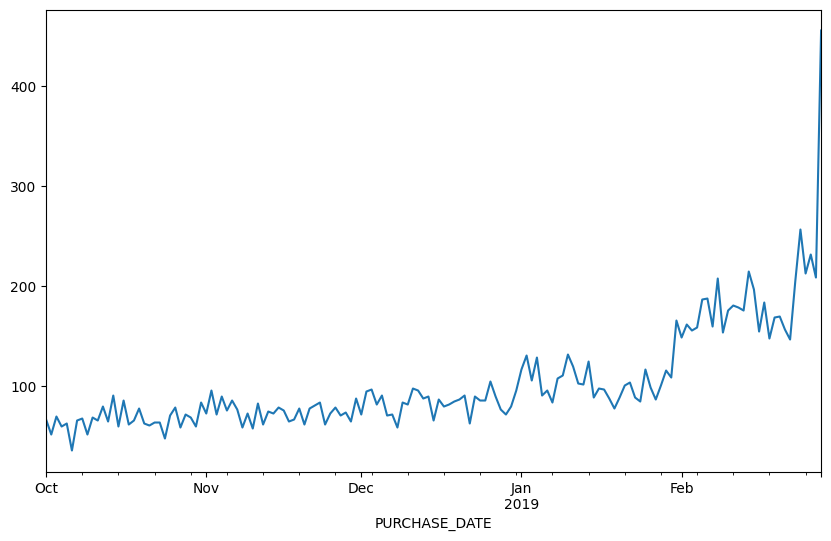

In [ ]:
purchase_counts = dsTestX['PURCHASE_DATE'].value_counts().sort_index()

# Plot the number of purchases for each purchase date
purchase_counts.plot(figsize=(10, 6))

In [ ]:
first_purchase_dates = dsTestX.groupby('MAGIC_KEY')['PURCHASE_DATE'].min()
last_purchase_dates = dsTestX.groupby('MAGIC_KEY')['PURCHASE_DATE'].max()

# Merge the aggregated results back into the original DataFrame
dsTestX2 = dsTestX.merge(first_purchase_dates, on='MAGIC_KEY', suffixes=('', '_first'))
dsTestX2 = dsTestX2.merge(last_purchase_dates, on='MAGIC_KEY', suffixes=('', '_last'))
dsTestX2

,MAGIC_KEY,PURCHASE_DATE,MEAT,PURCHASE_DATE_first,PURCHASE_DATE_last
0,2BCFE9C06A7,2019-02-23,3.6,2019-02-23,2019-02-28
1,2BCFE9C06A7,2019-02-24,10.8,2019-02-23,2019-02-28
2,2BCFE9C06A7,2019-02-27,14.4,2019-02-23,2019-02-28
3,2BCFE9C06A7,2019-02-28,7.2,2019-02-23,2019-02-28
4,2BCFE9C06A7,2019-02-28,21.6,2019-02-23,2019-02-28
...,...,...,...,...,...
15348,2C080B48630,2018-11-25,0.0,2018-11-25,2018-11-25
15349,2C08243C58E,2019-01-31,2.4,2019-01-31,2019-01-31
15350,2C082C78575,2018-10-25,1.8,2018-10-25,2018-10-25
15351,2C083B1F3E5,2019-02-10,2.4,2018-10-23,2019-02-10


In [ ]:
dsTest_last_purchase = dsTestX2[dsTestX2['PURCHASE_DATE'] == dsTestX2['PURCHASE_DATE_last']]
dsTest_last_purchase

,MAGIC_KEY,PURCHASE_DATE,MEAT,PURCHASE_DATE_first,PURCHASE_DATE_last
3,2BCFE9C06A7,2019-02-28,7.2,2019-02-23,2019-02-28
4,2BCFE9C06A7,2019-02-28,21.6,2019-02-23,2019-02-28
5,2C2A872B5A2,2018-12-04,2.2,2018-10-01,2018-12-04
7,2C6A897671B,2019-02-28,2.2,2018-12-20,2019-02-28
16,2C6F1287F53,2019-02-28,18.0,2018-10-30,2019-02-28
...,...,...,...,...,...
15347,2C0804EFE49,2018-12-15,2.5,2018-12-15,2018-12-15
15348,2C080B48630,2018-11-25,0.0,2018-11-25,2018-11-25
15349,2C08243C58E,2019-01-31,2.4,2019-01-31,2019-01-31
15350,2C082C78575,2018-10-25,1.8,2018-10-25,2018-10-25


In [ ]:
columns_to_drop = ['PURCHASE_DATE_last']
dsTest_last_purchase.drop(columns=columns_to_drop, inplace=True)

<ipython-input-130-96536d03aa63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsTest_last_purchase.drop(columns=columns_to_drop, inplace=True)


In [ ]:
ds2 = dsTest_last_purchase.groupby(['MAGIC_KEY', 'PURCHASE_DATE', 'PURCHASE_DATE_first'])['MEAT'].sum().reset_index()
ds2

,MAGIC_KEY,PURCHASE_DATE,PURCHASE_DATE_first,MEAT
0,2499B9E0C1C,2019-02-18,2019-02-02,0.0
1,24D1CF7CA25,2019-02-21,2019-02-11,0.0
2,24D279F5F06,2018-10-03,2018-10-03,1.3
3,27D86DD37C9,2018-12-22,2018-10-08,2.2
4,28CF0640F8B,2019-02-25,2018-11-17,0.0
...,...,...,...,...
5373,2E224CE9C74,2018-12-24,2018-12-24,2.2
5374,2E2336C7F7F,2019-02-28,2018-10-05,2.2
5375,2E5E4A47984,2019-02-26,2019-02-26,3.6
5376,2E6B1F1DFFA,2018-12-02,2018-12-02,2.9


In [ ]:
start_date = pd.to_datetime('2019-02-14')
end_date = pd.to_datetime('2019-02-28')
end_date2 = pd.to_datetime('2019-03-01')
ds2.loc[(ds2['PURCHASE_DATE_first'] >= start_date) & (ds2['PURCHASE_DATE_first'] <= end_date), 'DUR'] = (end_date2 - ds2['PURCHASE_DATE_first']).dt.days

# Set DUR to 15 for other rows
ds2['DUR'].fillna(15, inplace=True)
ds2

,MAGIC_KEY,PURCHASE_DATE,PURCHASE_DATE_first,MEAT,DUR
0,2499B9E0C1C,2019-02-18,2019-02-02,0.0,15.0
1,24D1CF7CA25,2019-02-21,2019-02-11,0.0,15.0
2,24D279F5F06,2018-10-03,2018-10-03,1.3,15.0
3,27D86DD37C9,2018-12-22,2018-10-08,2.2,15.0
4,28CF0640F8B,2019-02-25,2018-11-17,0.0,15.0
...,...,...,...,...,...
5373,2E224CE9C74,2018-12-24,2018-12-24,2.2,15.0
5374,2E2336C7F7F,2019-02-28,2018-10-05,2.2,15.0
5375,2E5E4A47984,2019-02-26,2019-02-26,3.6,3.0
5376,2E6B1F1DFFA,2018-12-02,2018-12-02,2.9,15.0


In [ ]:
ds2

,MAGIC_KEY,PURCHASE_DATE,PURCHASE_DATE_first,MEAT,DUR
0,2499B9E0C1C,2019-02-18,2019-02-02,0.0,15.0
1,24D1CF7CA25,2019-02-21,2019-02-11,0.0,15.0
2,24D279F5F06,2018-10-03,2018-10-03,1.3,15.0
3,27D86DD37C9,2018-12-22,2018-10-08,2.2,15.0
4,28CF0640F8B,2019-02-25,2018-11-17,0.0,15.0
...,...,...,...,...,...
5373,2E224CE9C74,2018-12-24,2018-12-24,2.2,15.0
5374,2E2336C7F7F,2019-02-28,2018-10-05,2.2,15.0
5375,2E5E4A47984,2019-02-26,2019-02-26,3.6,3.0
5376,2E6B1F1DFFA,2018-12-02,2018-12-02,2.9,15.0


In [ ]:
filtered_dsTest = dsTest[(dsTest['PURCHASE_DATE'] >= '2019-02-14') &
                         (dsTest['PURCHASE_DATE'] <= '2019-02-28')]

# Group by 'MAGIC_KEY' and calculate the sum of 'MEAT' for each group
total_meat_purchased = filtered_dsTest.groupby('MAGIC_KEY')['MEAT'].sum()
tm = total_meat_purchased.reset_index()
tm.rename(columns={'MEAT': 'MEAT15'}, inplace=True)
tm

,MAGIC_KEY,MEAT15
0,2499B9E0C1C,0.0
1,24D1CF7CA25,0.0
2,28CF0640F8B,0.0
3,28CF4A2D077,0.0
4,28CFD58918B,0.0
...,...,...
2113,2D4F79A987F,0.0
2114,2D7282C6DEB,18.0
2115,2D82F624BA6,2.0
2116,2E2336C7F7F,2.2


In [ ]:
ds3 = pd.merge(ds2, tm, on = 'MAGIC_KEY', how = 'left')
ds3['MEAT15'] = ds3['MEAT15'].fillna(0)
ds3

,MAGIC_KEY,PURCHASE_DATE,PURCHASE_DATE_first,MEAT,DUR,MEAT15
0,2499B9E0C1C,2019-02-18,2019-02-02,0.0,15.0,0.0
1,24D1CF7CA25,2019-02-21,2019-02-11,0.0,15.0,0.0
2,24D279F5F06,2018-10-03,2018-10-03,1.3,15.0,0.0
3,27D86DD37C9,2018-12-22,2018-10-08,2.2,15.0,0.0
4,28CF0640F8B,2019-02-25,2018-11-17,0.0,15.0,0.0
...,...,...,...,...,...,...
5373,2E224CE9C74,2018-12-24,2018-12-24,2.2,15.0,0.0
5374,2E2336C7F7F,2019-02-28,2018-10-05,2.2,15.0,2.2
5375,2E5E4A47984,2019-02-26,2019-02-26,3.6,3.0,3.6
5376,2E6B1F1DFFA,2018-12-02,2018-12-02,2.9,15.0,0.0


In [ ]:
def calculate_Y(row):
    if row['PURCHASE_DATE'].strftime('%Y-%m-%d') >= '2019-02-14' and row['PURCHASE_DATE'].strftime('%Y-%m-%d') <= '2019-02-28':
        return row['MEAT15']
    else:
        return row['MEAT']

In [ ]:
test.shape

(5379, 1)

In [ ]:
new_df = pd.DataFrame({'MAGIC_KEY': ds3['MAGIC_KEY'], 'Y': ds3.apply(calculate_Y, axis=1)})
pred = test.merge(new_df, on = 'MAGIC_KEY', how = 'left')

In [ ]:
mean_Y = pred['Y'].mean()

# Replace null values with the mean value
pred['Y'].fillna(mean_Y, inplace=True)

MAGIC_KEY    0
Y            0
dtype: int64

In [ ]:
pred = pred.rename(columns={'Y': 'MEAT'})

In [ ]:
pred.to_csv('p3vF.csv', index=False)

In [ ]:
pred.merge(dsTestAll, on = 'MAGIC_KEY', how = 'inner' )

,MAGIC_KEY,Y,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2BCFE9C06A7,57.6,2019-02-23,56.0,1.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
1,2BCFE9C06A7,57.6,2019-02-24,56.0,3.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
2,2BCFE9C06A7,57.6,2019-02-27,56.0,4.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
3,2BCFE9C06A7,57.6,2019-02-28,56.0,2.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
4,2BCFE9C06A7,57.6,2019-02-28,56.0,6.0,Premium,Delivery from Collection Point,10.0,3.6,15.00
...,...,...,...,...,...,...,...,...,...,...
15349,2C080B48630,0.0,2018-11-25,8.0,1.0,Premium,Home Delivery - CoD,10.0,0.0,12.18
15350,2C08243C58E,2.4,2019-01-31,3.0,1.0,Premium,Home Delivery - CoD,0.0,2.4,11.96
15351,2C082C78575,1.8,2018-10-25,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
15352,2C083B1F3E5,2.4,2019-02-10,76.0,1.0,Premium,Delivery from Collection Point,0.0,2.4,11.96


In [ ]:
pd.merge(dsTest, p, on = 'MAGIC_KEY', how = 'inner')

,MAGIC_KEY,PURCHASE_DATE,MEAT,Y,PURCHASE_DATE_first,PURCHASE_DATE_last,index
0,2BCFE9C06A7,2019-02-23,3.6,NaN,2019-02-23,2019-02-28,1333
1,2BCFE9C06A7,2019-02-24,97.2,NaN,2019-02-23,2019-02-28,1333
2,2BCFE9C06A7,2019-02-27,230.4,NaN,2019-02-23,2019-02-28,1333
3,2BCFE9C06A7,2019-02-28,28.8,28.8,2019-02-23,2019-02-28,1333
4,2BCFE9C06A7,2019-02-28,777.6,777.6,2019-02-23,2019-02-28,1333
...,...,...,...,...,...,...,...
287,2C9C89C9EBB,2019-02-27,3.6,NaN,2018-10-21,2019-02-28,4711
288,2C9C89C9EBB,2019-02-28,230.4,230.4,2018-10-21,2019-02-28,4711
289,2C9C89C9EBB,2018-12-06,2.2,NaN,2018-10-21,2019-02-28,4711
290,2C9C89C9EBB,2018-12-19,2.2,NaN,2018-10-21,2019-02-28,4711


In [ ]:
# Group by customer ID and calculate the number of days since the last purchase
dsTestS = dsTest.sort_values(by=['MAGIC_KEY', 'PURCHASE_DATE'])
#dsTestS['PURCHASE_DATE'] = pd.to_datetime(dsTestS['PURCHASE_DATE'])
dsTestS['delDays'] = dsTestS.groupby('MAGIC_KEY')['PURCHASE_DATE'].diff().dt.days
# Fill NaN values (for the first purchase of each customer) with 0
#dsTestS['delDays'] = dsTestS['delDays'].fillna(0)

In [ ]:
dsTestS

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,delDays
7398,2499B9E0C1C,2019-02-02,89.0,1.0,Premium,Delivery from Collection Point,10.0,0.0,12.18,NaN
7399,2499B9E0C1C,2019-02-09,89.0,1.0,Premium,Delivery from Collection Point,10.0,0.0,12.18,7.0
7400,2499B9E0C1C,2019-02-18,90.0,1.0,Premium,Delivery from Collection Point,10.5,0.0,12.78,9.0
5113,24D1CF7CA25,2019-02-11,230.0,1.0,Standard,Delivery from Collection Point,8.4,0.0,10.14,NaN
5114,24D1CF7CA25,2019-02-21,230.0,1.0,Standard,Delivery from Collection Point,8.4,0.0,10.14,10.0
...,...,...,...,...,...,...,...,...,...,...
6963,2E6B1F1DFFA,2018-12-02,166.0,1.0,Premium,Delivery from Collection Point,12.0,2.9,23.98,NaN
6494,2E6B1F28267,2018-11-02,163.0,1.0,Premium,Delivery from Collection Point,11.0,2.2,23.98,NaN
6493,2E6B1F28267,2018-12-01,134.0,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98,29.0
6492,2E6B1F28267,2019-01-01,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98,31.0


In [ ]:
dsTestS['QUALITY'].value_counts()

QUALITY
Premium     12114
Standard     3239
Name: count, dtype: int64

In [ ]:
dsTestS['DELIVERY_OPTION'].value_counts()

DELIVERY_OPTION
Delivery from Collection Point     11891
Home Delivery - CoD                 3421
Home Delivery - Digital Payment       41
Name: count, dtype: int64

In [ ]:
dsTestS=dsTestS.dropna()

In [ ]:
average_delDays = dsTestS.groupby('MAGIC_KEY')['delDays'].mean()
average_delDays

MAGIC_KEY
2499B9E0C1C     8.000000
24D1CF7CA25    10.000000
27D86DD37C9    37.500000
28CF0640F8B    33.333333
28D23EC2ED4     8.000000
                 ...    
2D7F3886691    23.250000
2D82F624BA6    37.500000
2E19F98075D    25.500000
2E2336C7F7F     7.300000
2E6B1F28267    30.333333
Name: delDays, Length: 2519, dtype: float64

In [ ]:
dsTest15 = dsTest[(dsTest['PURCHASE_DATE'] >= '2019-02-14') & (dsTest['PURCHASE_DATE'] <= '2019-02-28')]

In [ ]:
dsTestS = dsTest.sort_values(by=['MAGIC_KEY', 'PURCHASE_DATE'])
dsTestS['delDays'] = dsTestS.groupby('MAGIC_KEY')['PURCHASE_DATE'].diff().dt.days
# Fill NaN values (for the first purchase of each customer) with 0
dsTestS['delDays'] = dsTestS['delDays'].fillna(0)

In [ ]:
dsTestS.head()

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,delDays
7398,2499B9E0C1C,2019-02-02,89.0,1.0,Premium,Delivery from Collection Point,10.0,0.0,12.18,0.0
7399,2499B9E0C1C,2019-02-09,89.0,1.0,Premium,Delivery from Collection Point,10.0,0.0,12.18,7.0
7400,2499B9E0C1C,2019-02-18,90.0,1.0,Premium,Delivery from Collection Point,10.5,0.0,12.78,9.0
5113,24D1CF7CA25,2019-02-11,230.0,1.0,Standard,Delivery from Collection Point,8.4,0.0,10.14,0.0
5114,24D1CF7CA25,2019-02-21,230.0,1.0,Standard,Delivery from Collection Point,8.4,0.0,10.14,10.0


In [ ]:
dsTestS['delDays'].value_counts().reset_index()['count'][:50].sum()/dsTestS['delDays'].value_counts().reset_index()['count'][:].sum()

0.9482219617037906

In [ ]:
dsTestS['delDays'].value_counts().reset_index()

,delDays,count
0,0.0,5469
1,5.0,479
2,31.0,471
3,6.0,459
4,7.0,458
...,...,...
138,129.0,1
139,139.0,1
140,144.0,1
141,131.0,1


Observing data from last 2 months should be enough

## Splitting

In [ ]:
dsTestS['delDays'].value_counts().reset_index()

In [ ]:
trainDs = dsTestS[(dsTestS['PURCHASE_DATE'] >= '2018-12-01') & (dsTestS['PURCHASE_DATE'] <= '2019-01-31')]
testDs = dsTestS[(dsTestS['PURCHASE_DATE'] >= '2019-02-01') & (dsTestS['PURCHASE_DATE'] <= '2019-02-15')]

In [ ]:
trainDs

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,delDays
4036,27D86DD37C9,2018-12-22,163.0,1.0,Premium,Delivery from Collection Point,11.0,2.2,23.98,43.0
12166,28D20C72E49,2018-12-26,246.0,1.0,Standard,Delivery from Collection Point,0.0,2.5,13.96,0.0
12168,28D337DC47B,2019-01-23,246.0,1.0,Standard,Delivery from Collection Point,0.0,2.5,13.96,0.0
9616,28D3BEA55EF,2019-01-15,201.0,1.0,Standard,Home Delivery - CoD,8.5,0.0,10.14,55.0
5115,28D3CF45F71,2018-12-03,198.0,1.0,Standard,Home Delivery - CoD,8.1,0.0,9.96,0.0
...,...,...,...,...,...,...,...,...,...,...
11032,2E2336C7F7F,2019-01-22,89.0,1.0,Premium,Delivery from Collection Point,10.0,0.0,12.18,5.0
11033,2E2336C7F7F,2019-01-29,89.0,1.0,Premium,Delivery from Collection Point,10.0,0.0,12.18,7.0
6963,2E6B1F1DFFA,2018-12-02,166.0,1.0,Premium,Delivery from Collection Point,12.0,2.9,23.98,0.0
6493,2E6B1F28267,2018-12-01,134.0,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98,29.0


# Analysis

In [ ]:
trainDs.groupby(['MAGIC_KEY', 'BOX_ID']).size().reset_index(name='PurchaseCount')['PurchaseCount'].value_counts()

PurchaseCount
1     3032
2      386
3      160
4       94
5       49
6       43
7       25
8       15
9       13
11       6
10       5
13       4
14       1
20       1
12       1
17       1
Name: count, dtype: int64

In [ ]:
trainDs['QUALITY'].value_counts()

QUALITY
Premium     4545
Standard    1261
Name: count, dtype: int64

In [ ]:
trainDs['DELIVERY_OPTION'].value_counts()

DELIVERY_OPTION
Delivery from Collection Point     4507
Home Delivery - CoD                1280
Home Delivery - Digital Payment      19
Name: count, dtype: int64

In [ ]:
trainDs['BOX_ID'].value_counts()

BOX_ID
89.0     977
8.0      553
162.0    365
238.0    343
163.0    332
        ... 
175.0      1
278.0      1
269.0      1
257.0      1
135.0      1
Name: count, Length: 106, dtype: int64

## Digital Payment can be ignored

In [ ]:
trainDs['BOX_COUNT'].value_counts()

BOX_COUNT
1.0    5787
2.0      17
4.0       1
3.0       1
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def eval(pred):
  testMeat = testDs.groupby('MAGIC_KEY')['MEAT'].sum()
  #predict = pd.merge(testMeat['MAGIC_KEY'], pred, on = 'MAGIC_KEY', how = 'left')
  mse = mean_squared_error(testMeat,pred)
  return np.sqrt(mse)